#KUNAL REWADE [TB04856]


# Task 1b: Build a logistic regression model 
# Using the dataset “student_data.csv,” write code to (1) create a visualization of the data, (2) fit a model using logistic regression, (3) output model coefficients and performance metrics such as accuracy and AUC and ROC


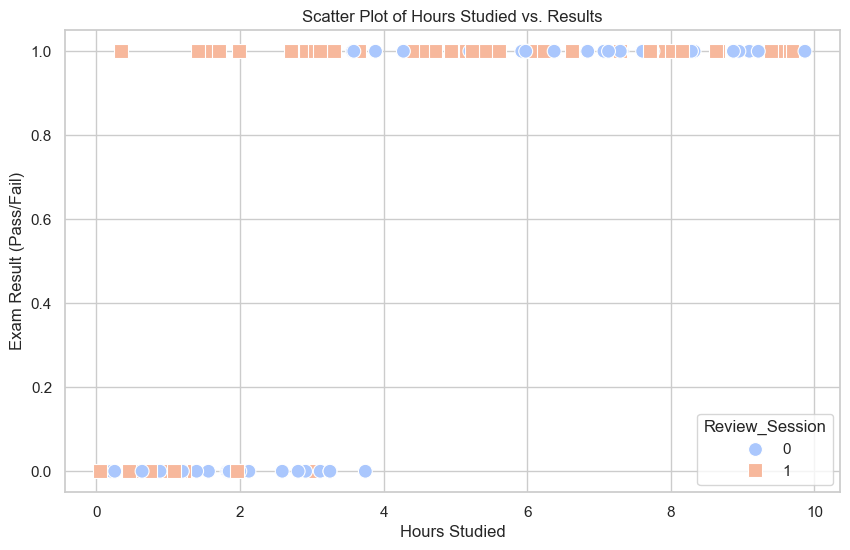

Model Coefficients:
  Intercept: -4.613738915956628
  Hours Studied Coefficient: 1.365420163031938
  Review Session Coefficient: 1.8779759145535342

Performance Metrics:
  Accuracy: 0.93
  AUC Score: 0.98


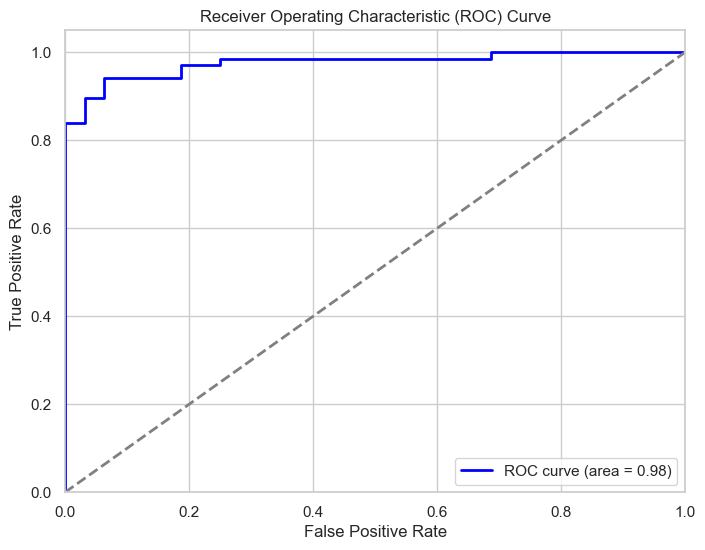

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Load the dataset
file_path = 'student_data.csv'  # Update with the correct path
student_data = pd.read_csv(file_path)

# Visualize the data
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Results', hue='Review_Session', style='Review_Session', data=student_data, palette='coolwarm', markers=['o', 's'], s=100)
plt.title('Scatter Plot of Hours Studied vs. Results')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Result (Pass/Fail)')
plt.show()

# Prepare the data
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]  # probabilities for the positive class

# Calculate model performance metrics
accuracy = accuracy_score(y, y_pred)
auc_score = roc_auc_score(y, y_pred_proba)

# Coefficients
coefficients = model.coef_[0]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Display the results
print("Model Coefficients:")
print(f"  Intercept: {model.intercept_[0]}")
print(f"  Hours Studied Coefficient: {coefficients[0]}")
print(f"  Review Session Coefficient: {coefficients[1]}")
print("\nPerformance Metrics:")
print(f"  Accuracy: {accuracy:.2f}")
print(f"  AUC Score: {auc_score:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Task 2:  Understanding and Prevent Overfitting in the context of SVM 

# Write code to fit a Support Vector Machine model using (1) linear kernel and (2) RBF kernel. For the RBF kernel, use grid search to find the best gamma parameter using k-fold cross-validation.


In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'student_data.csv'  # Update with the actual path to your dataset
student_data = pd.read_csv(file_path)

# Extract features and target from the dataset
X = student_data[['Hours_Studied', 'Review_Session']]
y = student_data['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. SVM with a Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
print("Classification report for SVM with Linear Kernel:")
print(classification_report(y_test, y_pred_linear))

# 2. SVM with an RBF Kernel and Grid Search for Best Gamma
param_grid = {'gamma': np.logspace(-4, 1, 6)}
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
y_pred_rbf = grid_search.predict(X_test_scaled)

# Output the best gamma value found
best_gamma = grid_search.best_params_['gamma']
print("Best gamma for RBF kernel:", best_gamma)
print("Classification report for SVM with RBF Kernel:")
print(classification_report(y_test, y_pred_rbf))


Classification report for SVM with Linear Kernel:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.85      0.92        20

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30

Best gamma for RBF kernel: 10.0
Classification report for SVM with RBF Kernel:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.95      0.90      0.92        20

    accuracy                           0.90        30
   macro avg       0.88      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



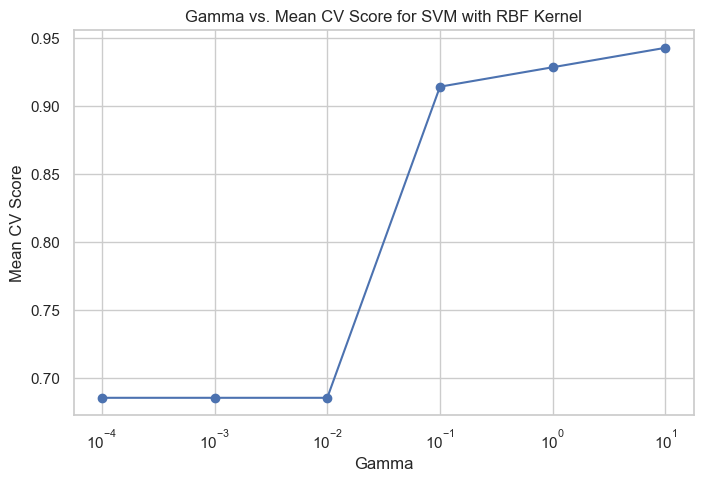

In [6]:
import matplotlib.pyplot as plt

# Extract the mean test scores from the grid search results
mean_scores = grid_search.cv_results_['mean_test_score']
gammas = np.logspace(-4, 1, 6)

# Plotting
plt.figure(figsize=(8, 5))
plt.semilogx(gammas, mean_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Gamma')
plt.ylabel('Mean CV Score')
plt.title('Gamma vs. Mean CV Score for SVM with RBF Kernel')
plt.grid(True)
plt.show()
